In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Office & Administration Series.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,...,training_session,number_of_participant,training_field,training_name,cross_selling,upselling,sales_ID,sales_name,sales_email,sales_phone
0,0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,...,17,18,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Electronic Filing Management With Simple Datab...,Electronic Filing Management With Simple Datab...,S0001,Tasnim Fujiati,saragihalika@hotmail.com,+62 (914) 912-3957
1,1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,...,17,20,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Electronic Filing Management With Simple Datab...,Electronic Filing Management With Simple Datab...,S0002,"Jelita Irawan, S.Ked",agnessaputra@yahoo.com,(0711) 678 9718
2,2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,...,16,20,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Electronic Filing Management With Simple Datab...,Interactive Dashboard with Microsoft Excel,S0003,Dr. Yulia Siregar,najmudinerik@hotmail.com,+62 (68) 864-9445
3,3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,...,17,19,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Electronic Filing Management With Simple Datab...,Interactive Dashboard with Microsoft Excel,S0004,Indah Sihombing,vmarpaung@hotmail.com,+62 (087) 511-0540
4,4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,...,16,20,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Electronic Filing Management With Simple Datab...,Interactive Dashboard with Microsoft Excel,S0005,"Okta Purnawati, S.Farm",wasitacandra@hotmail.com,+62 (027) 997 6053


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0.1                                 5000 non-null   int64  
 1   Unnamed: 0                                   5000 non-null   int64  
 2   company_ID                                   5000 non-null   object 
 3   company_name                                 5000 non-null   object 
 4   company_pic                                  5000 non-null   object 
 5   company_address                              5000 non-null   object 
 6   company_phone                                5000 non-null   object 
 7   company_email                                5000 non-null   object 
 8   company_field                                5000 non-null   object 
 9   transaction_date                             5000 non-null   object 
 10  

In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["upselling"], axis=1, inplace=True)

In [5]:
# Preprocessing untuk fitur kategori
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

numeric_features = ["level_training_process", "possibility_of_purchasing_the_same_training", "training_session"]

categorical_features = ["group", "communication_channel", "complaints", "training_name", "communication_quality", "tren_mode_factor", "purchasing_time_patterns"]


drop_features = ["Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email", "company_field",
                 "transaction_date", "total_payment", "brand_sustainability", "rating_training",
                 "interest_in_discount_program", "training_ID", "training_price", "discount_training", "training_field",
                 "trainer_name", "sales_ID", "sales_name", "sales_email", "sales_phone"]

# Gabungkan transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('drop', 'drop', drop_features)
    ],
    remainder="passthrough"
    )

In [6]:
X = df.drop("cross_selling", axis=1)
y = df["cross_selling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

pkl = joblib.load(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\modelling\classification\cross_selling\model_save\model5.pkl")
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("models", pkl)
])
model.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 14
[LightGBM] [Info] Start training from score -2.065539
[LightGBM] [Info] Start training from score -2.061602
[LightGBM] [Info] Start training from score -2.081444
[LightGBM] [Info] Start training from score -2.087474
[LightGBM] [Info] Start training from score -2.053774
[LightGBM] [Info] Start training from score -2.087474
[LightGBM] [Info] Start training from score -2.093540
[LightGBM] 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['level_training_process',
                                                   'possibility_of_purchasing_the_same_training',
                                                   'training_session']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   Ordi...
                                                   'company_email',
                                                   'company_field',
                                                   'transaction_date',
                                                   'total_payment',
                                                   'brand_sustainability',
                                                   'rating_training',
                                                   'interest_in_discount_program',
                                                   'training_ID',
                                                   'training_price',
                                                   'discount_training',
                                                   'training_field',
                                                   'trainer_name', 'sales_ID',
                                                   'sales_name', 'sales_email',
                                                   'sales_phone'])])),
                ('models',
                 LGBMClassifier(learning_rate=0.01, max_depth=5,
                                n_estimators=200))])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


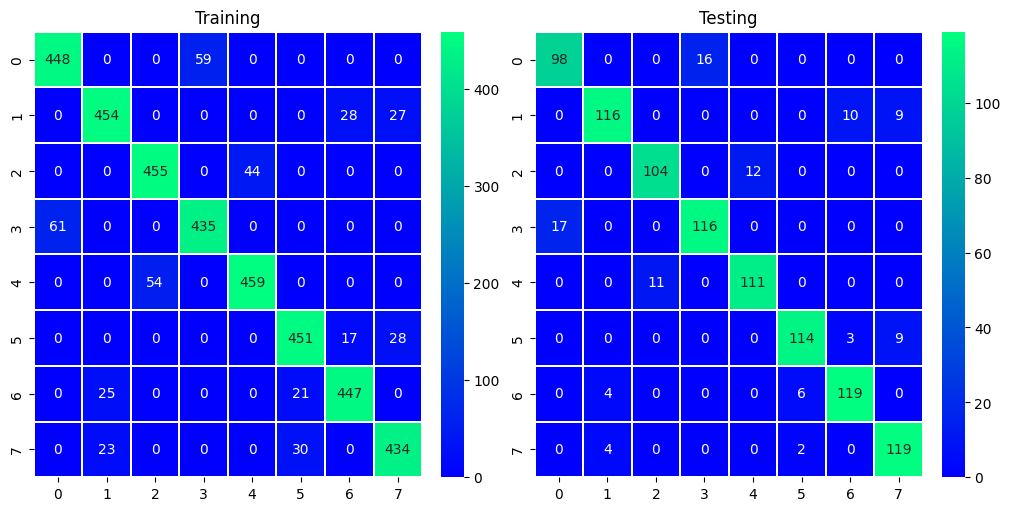

In [7]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()


In [8]:
print(classification_report(y_test, y_pred))

                                                                       precision    recall  f1-score   support

                       Electronic Filing & Document Management System       0.85      0.86      0.86       114
    Electronic Filing Management With Simple Database Software & Apps       0.94      0.86      0.90       135
                Excel & Powerpoint For Powerful Business Applications       0.90      0.90      0.90       116
                           Interactive Dashboard with Microsoft Excel       0.88      0.87      0.88       133
                                  Managing General Affairs Excellence       0.90      0.91      0.91       122
                                Manajemen Filing & Tata Kelola Kantor       0.93      0.90      0.92       126
Powerful Database Analysis & Dashboard Reporting with Microsoft Excel       0.90      0.92      0.91       129
                                        Secretary Development Program       0.87      0.95      0.91       125


In [9]:
a = model.predict_proba(X_test.iloc[:1, :])
b = ["Electronic Filing & Document Management System", "Electronic Filing Management With Simple Database Software & Apps", 
     "Excel & Powerpoint For Powerful Business Applications", "Interactive Dashboard with Microsoft Excel", "Managing General Affairs Excellence",
     "Manajemen Filing & Tata Kelola Kantor",
     "Powerful Database Analysis & Dashboard Reporting with Microsoft Excel", "Secretary Development Program",
     ]

for i, j in zip(b, a.ravel()):
    print(i, f"{j*100:.2f}%")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Electronic Filing & Document Management System 7.88%
Electronic Filing Management With Simple Database Software & Apps 1.03%
Excel & Powerpoint For Powerful Business Applications 1.01%
Interactive Dashboard with Microsoft Excel 86.08%
Managing General Affairs Excellence 1.03%
Manajemen Filing & Tata Kelola Kantor 1.00%
Powerful Database Analysis & Dashboard Reporting with Microsoft Excel 1.00%
Secretary Development Program 0.98%


In [10]:
model.predict(X_test.iloc[:1, :])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array(['Interactive Dashboard with Microsoft Excel'], dtype=object)

In [11]:
y_test.iloc[0]

'Interactive Dashboard with Microsoft Excel'

In [12]:
X_test.iloc[:1, :]

,Unnamed: 0.1,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,...,training_price,discount_training,training_session,number_of_participant,training_field,training_name,sales_ID,sales_name,sales_email,sales_phone
1501,1501,1501,P1502,UD Napitupulu (Persero) Tbk,Kadir Sitompul,"Gg. Otto Iskandardinata No. 14\nSalatiga, DKI ...",+62 (0993) 413-3583,purwantitugiman@example.org,Aktivitas Kesehatan Manusia Dan Aktivitas Sosial,2024-02-10,...,5360000.0,33,14,15,Office & Administration Series,Powerful Database Analysis & Dashboard Reporti...,S0158,"Cut Tira Suryatmi, S.Gz",csiregar@yahoo.com,+62 (52) 302-7504


In [13]:
joblib.dump(model, "./pipeline_save/pipeline5.joblib")

['./pipeline_save/pipeline5.joblib']